In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/spe naice 2021/cyphercrescentlearn

/content/drive/.shortcut-targets-by-id/1P4s5xieSKsQDwndtl7HQffUIwuJDn8Pm/spe naice 2021/cyphercrescentlearn


In [ ]:
# import shutil
# shutil.unpack_archive('deepHSE_cleaned.zip', 'deepHSE_cleaned')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install fastai --upgrade -q
from fastai.vision.all import *

     |████████████████████████████████| 188 kB 9.7 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 


In [5]:
files = get_image_files('sota_deeplearning_classifier/deepHSE_cleaned')
files

(#6118) [Path('sota_deeplearning_classifier/deepHSE_cleaned/train/gloves/images299 (2).jpg'),Path('sota_deeplearning_classifier/deepHSE_cleaned/train/gloves/images298.jpg'),Path('sota_deeplearning_classifier/deepHSE_cleaned/train/gloves/images299.jpg'),Path('sota_deeplearning_classifier/deepHSE_cleaned/train/gloves/images297.jpg'),Path('sota_deeplearning_classifier/deepHSE_cleaned/train/gloves/images296 (2).jpg'),Path('sota_deeplearning_classifier/deepHSE_cleaned/train/gloves/images296.jpg'),Path('sota_deeplearning_classifier/deepHSE_cleaned/train/gloves/images297 (2).jpg'),Path('sota_deeplearning_classifier/deepHSE_cleaned/train/gloves/images511.jpg'),Path('sota_deeplearning_classifier/deepHSE_cleaned/train/gloves/images295.jpg'),Path('sota_deeplearning_classifier/deepHSE_cleaned/train/gloves/images295 (2).jpg')...]

In [6]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=RandomResizedCrop(224, min_scale=0.5),
                   batch_tfms=aug_transforms())

In [9]:
dls = fields.dataloaders('sota_deeplearning_classifier/deepHSE_cleaned')

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [10]:
dls.vocab

['boot', 'gloves', 'hard hat', 'road cones', 'vest', 'weld mask']

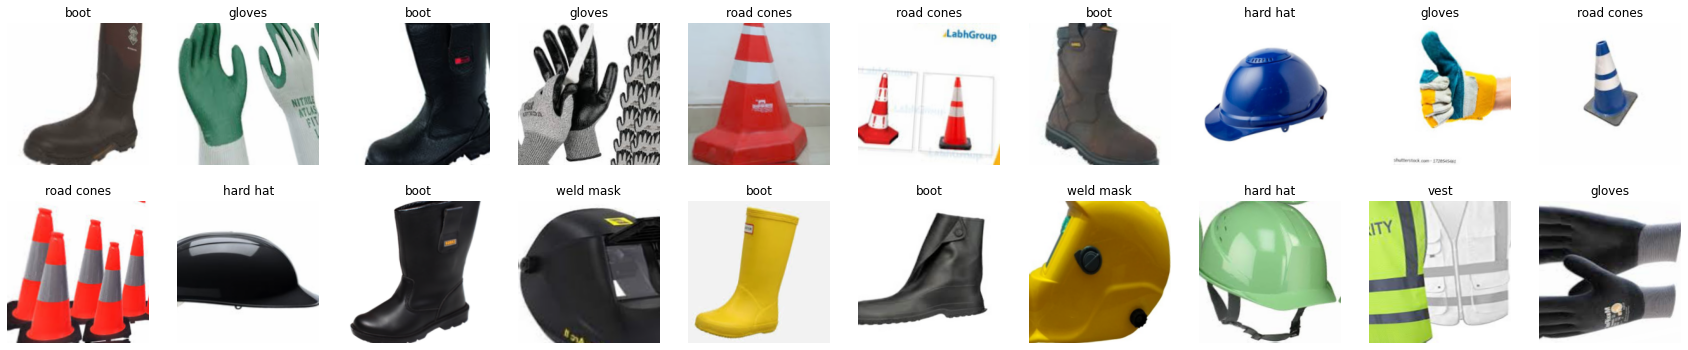

In [11]:
dls.train.show_batch(max_n=10, nrows=2, unique=False)

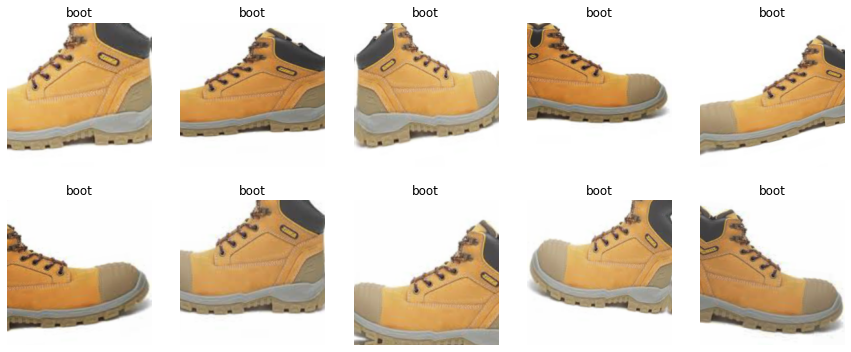

In [16]:
dls.train.show_batch(max_n=10, nrows=2, unique=True)

In [13]:
dls.train.show

<bound method Datasets.show of (#4895) [(PILImage mode=RGB size=225x225, TensorCategory(0)),(PILImage mode=RGB size=225x225, TensorCategory(1)),(PILImage mode=RGB size=225x225, TensorCategory(0)),(PILImage mode=RGB size=250x188, TensorCategory(0)),(PILImage mode=RGB size=810x810, TensorCategory(5)),(PILImage mode=RGB size=225x225, TensorCategory(0)),(PILImage mode=RGB size=171x295, TensorCategory(0)),(PILImage mode=RGB size=225x225, TensorCategory(1)),(PILImage mode=RGB size=250x250, TensorCategory(1)),(PILImage mode=RGB size=224x224, TensorCategory(1))...]>

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


In [ ]:
learn.fit_one_cycle(n_epoch=5, lr_max=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.485724,0.053963,0.015536,12:50
1,0.158003,0.047327,0.005724,00:39
2,0.093979,0.044077,0.008177,00:39
3,0.043195,0.037879,0.005724,00:39
4,0.037052,0.036953,0.004906,00:39


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(n_epoch=6, lr_max=slice(1e-5, 5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.035136,0.031490,0.006541,00:42
1,0.050236,0.034631,0.007359,00:42
2,0.033698,0.043236,0.007359,00:42
3,0.029931,0.037287,0.003271,00:42
4,0.018656,0.034674,0.004906,00:42
5,0.009997,0.034407,0.004088,00:42


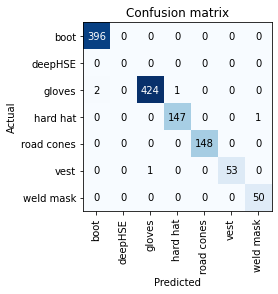

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

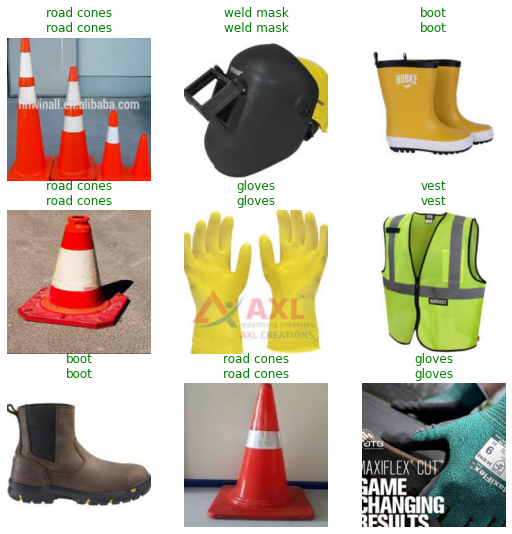

In [ ]:
learn.show_results()

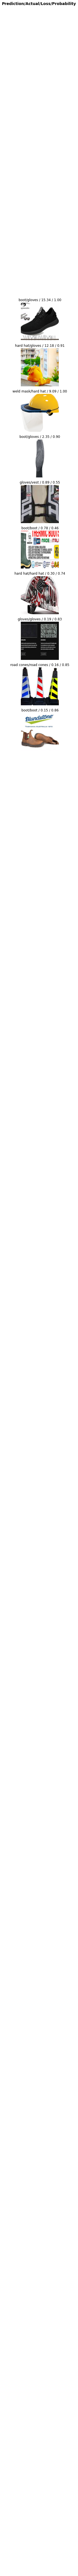

In [ ]:
interp.plot_top_losses(10, nrows=50)

In [ ]:
from fastai.vision.widgets import *

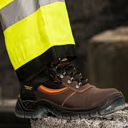

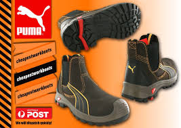

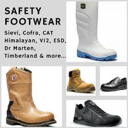

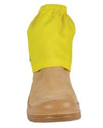

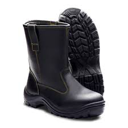

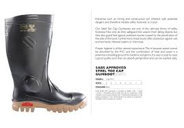

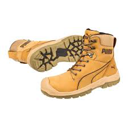

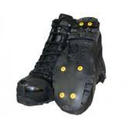

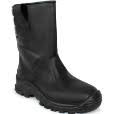

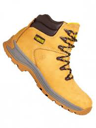

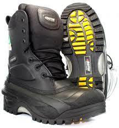

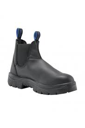

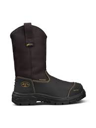

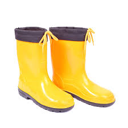

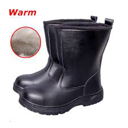

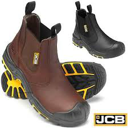

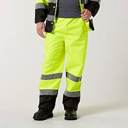

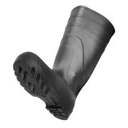

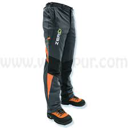

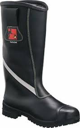

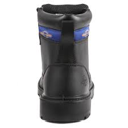

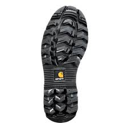

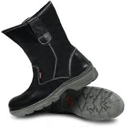

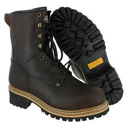

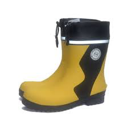

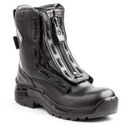

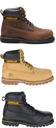

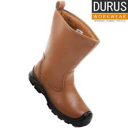

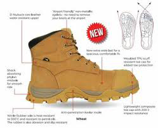

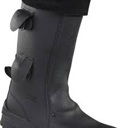

In [ ]:
model_data_set_cleaner = ImageClassifierCleaner(learn)
model_data_set_cleaner

In [ ]:
for idx in model_data_set_cleaner.delete(): model_data_set_cleaner.fns[idx].unlink()